In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("iris_data.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


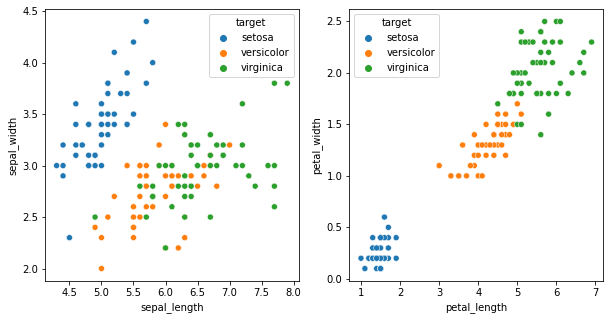

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(df["sepal_length"], df["sepal_width"],hue=df["target"])
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")

plt.subplot(1,2,2)
sns.scatterplot(df["petal_length"], df["petal_width"],hue=df["target"])
plt.xlabel("petal_length")
plt.ylabel("petal_width")

plt.show()

No handles with labels found to put in legend.


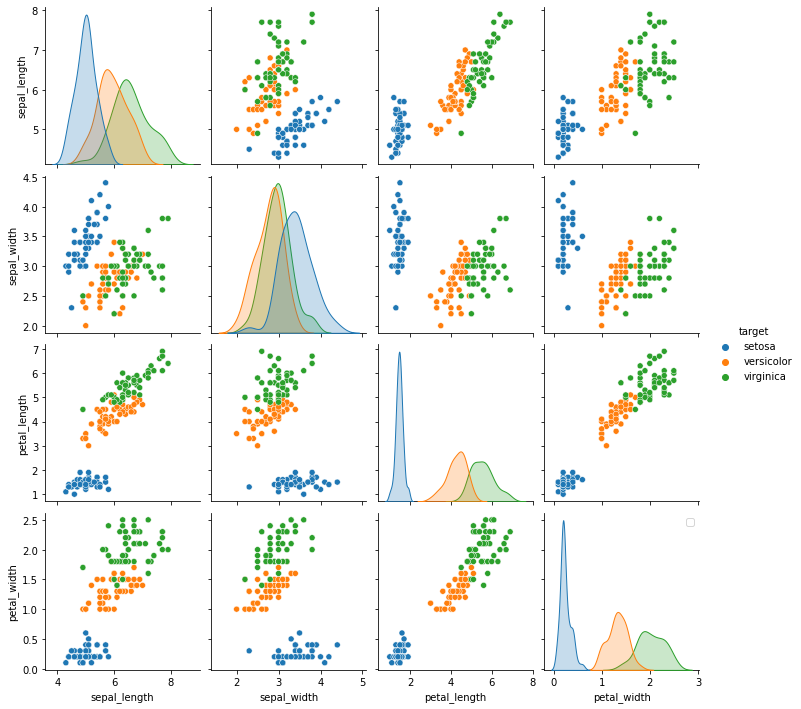

In [10]:
sns.pairplot(df, hue="target")
plt.legend()
plt.show()

由 scatter 及 pairplot 可以看出，鳶尾花會依不同的種類做不同範圍的分布

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

np.random.seed(7)
df = pd.read_csv("./iris_data.csv") # 須重新導入，不然會有錯誤

target_mapping = {"setosa":0, "versicolor":1, "virginica":2} # 將分類欄位轉換成 0~2
df["target"] = df["target"].map(target_mapping)
dataset = df.values
np.random.shuffle(dataset) 
X = dataset[:, 0:4]
Y = to_categorical(dataset[:,4])

X -= X.mean(axis=0)
X /= X.std(axis=0)

X_train, Y_train = X[:120], Y[:120]
X_test, Y_test = X[120:], Y[120:]

model = Sequential()
model.add(Dense(6, input_dim=4, activation = "relu"))
model.add(Dense(6, activation = "relu"))
model.add(Dense(3, activation = "softmax"))
model.summary()
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

model.fit(X_train, Y_train, epochs=100, batch_size=5)

loss, accuracy = model.evaluate(X_test, Y_test)
print(f"測試資料的準確度 = {accuracy}")
model.save("iris_tf.h5")

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 6)                 30        
_________________________________________________________________
dense_25 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 21        
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
24/24 [==============================] - 0s 895us/step - loss: 1.0276 - accuracy: 0.4500
Epoch 2/100
24/24 [==============================] - 0s 898us/step - loss: 1.0136 - accuracy: 0.4500
Epoch 3/100
24/24 [==============================] - 0s 875us/step - loss: 0.9997 - accuracy: 0.4500
Epoch 4/100
24/24 [==============================] - 0s 834us/step - loss: 0.9849 - a

24/24 [==============================] - 0s 832us/step - loss: 0.0672 - accuracy: 0.9833
Epoch 75/100
24/24 [==============================] - 0s 876us/step - loss: 0.0670 - accuracy: 0.9833
Epoch 76/100
24/24 [==============================] - 0s 848us/step - loss: 0.0657 - accuracy: 0.9833
Epoch 77/100
24/24 [==============================] - 0s 858us/step - loss: 0.0652 - accuracy: 0.9833
Epoch 78/100
24/24 [==============================] - 0s 910us/step - loss: 0.0634 - accuracy: 0.9833
Epoch 79/100
24/24 [==============================] - 0s 919us/step - loss: 0.0629 - accuracy: 0.9833
Epoch 80/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0624 - accuracy: 0.9833
Epoch 81/100
24/24 [==============================] - 0s 961us/step - loss: 0.0627 - accuracy: 0.9833
Epoch 82/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0617 - accuracy: 0.9833
Epoch 83/100
24/24 [==============================] - 0s 916us/step - loss: 0.0593 - accuracy: 0.98

In [39]:
Y_pred = model.predict_classes(X_test)
print(Y_pred)
Y_test = dataset[:, 4][120:].astype(int)
print(Y_test)

[0 1 1 2 2 1 1 0 1 1 0 0 0 1 1 0 2 2 1 2 0 2 1 1 0 2 1 2 1 0]
[0 1 1 2 2 1 2 0 1 1 0 0 0 1 1 0 2 2 1 2 0 2 1 1 0 2 1 2 1 0]


C:\Users\user\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


使用混淆矩陣(confusion matrix)進行分析

In [43]:
tb = pd.crosstab(Y_test, Y_pred, rownames = ["label"], colnames = ["predict"])
print(tb)

predict  0   1  2
label            
0        9   0  0
1        0  12  0
2        0   1  8
